### Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goals and Objectives

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


In [1]:
#Import Libraries & Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Filter out warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
# Import the data from the csv file
leads = pd.read_csv("Leads.csv")
leads.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
print(leads.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
(leads.shape)

(9240, 37)

In [5]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


##### We see lot of values as "Select" in the columns - which is as good as null value.
It indicates customer didn't fill the optional value in the form hence we're going to replace "Select" with NaN & then check for missing values.

In [6]:
leads.replace('Select',np.nan,inplace=True)
# Check for the perecentage of missing values
round((leads.isnull().sum()/9240) * 100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [7]:
# We'll drop the columns with more than 35% data missing 
to_drop = leads.columns[(leads.isnull().sum()/9240) *100 >35.0]
leads=leads.drop(to_drop,axis=1)

#Verify the columns are removed
leads.columns[(leads.isnull().sum()/9240)*100 >35.0]
round((leads.isnull().sum()/9240) * 100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [8]:
# Looking for columns with missing data more than 5%
column_with_missing_values = leads.columns[(leads.isnull().sum()/9240) *100 >5.0]
print(column_with_missing_values)

Index(['Country', 'What is your current occupation',
       'What matters most to you in choosing a course'],
      dtype='object')


In [9]:
leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Germany                    4
Kuwait                     4
Nigeria                    4
Canada                     4
Sweden                     3
Philippines                2
Uganda                     2
Asia/Pacific Region        2
Belgium                    2
Ghana                      2
Netherlands                2
China                      2
Bangladesh                 2
Italy                      2
Switzerland                1
Sri Lanka                  1
Denmark                    1
Malaysia                   1
Liberia                    1
Indonesia                  1
Vietnam       

In [10]:
leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [11]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [12]:
# We'll treat the missing values after imputing values for the ones we can.

In [13]:
# For the column Country, We can replace the NaN's with mode ie, 'India'. Note : Highly skewed. May drop at a later point.
leads.Country.fillna('India', inplace=True)
leads.Country.isnull().sum()

0

In [14]:
#For the column 'What is your current occupation', We can impute the missing value with 'Other'
leads['What is your current occupation'].fillna('Other', inplace=True)
leads['What is your current occupation'].isnull().sum()

0

In [15]:
# We'll drop the column 'What matters most to you in choosing a course' since it is highly skewed.
leads = leads.drop('What matters most to you in choosing a course', axis=1)

In [16]:
round((leads.isnull().sum()/9240) * 100,2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Country                                     0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates

### Since the missing data in the rest of the columns is less than 1.5% - we can drop the missing rows.

In [17]:
leads.dropna(inplace=True)
leads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Country                                     0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content 

In [18]:
leads.shape

(9074, 26)

In [19]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [20]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   object 
 5   Do Not Call                               9074 non-null   object 
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   int64  
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                       

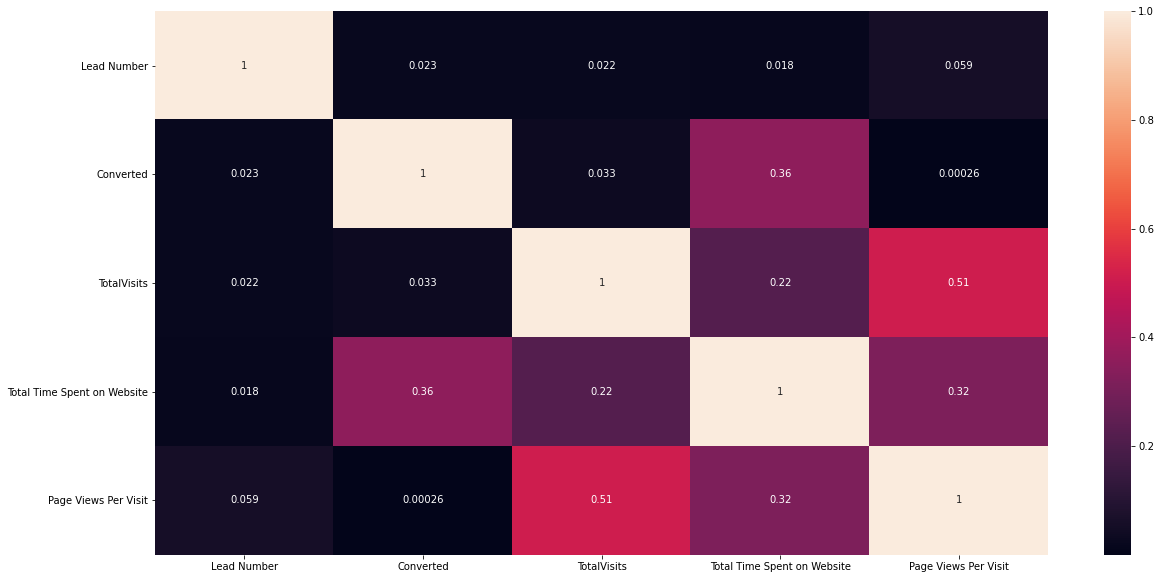

In [21]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))       
sns.heatmap(leads.corr(),annot = True)
plt.show()

### Univariate Analysis

In [22]:
leads['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

In [23]:
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
welearnblog_Home        1
Pay per Click Ads       1
youtubechannel          1
NC_EDM                  1
WeLearn                 1
testone                 1
blog                    1
Name: Lead Source, dtype: int64

#### As per the above value counts, many levels of column Lead Source can be grouped together as they are insignificant individually

In [24]:
leads['Lead Source'].replace(['Facebook','NC_EDM','Press_Release', 'testone', 'youtubechannel', 'welearnblog_Home', 'Live Chat',
                             'Click2call','WeLearn','Social Media','bing','Pay per Click Ads','blog'], 'Others', inplace=True)

# We'll combine 'google' & 'Google'
leads['Lead Source'].replace('google', 'Google', inplace=True)

In [25]:
leads['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Others                54
Name: Lead Source, dtype: int64

In [26]:
leads['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

#### As per the above value counts, many levels of column Last Activity can be grouped together as they are insignificant individually

In [27]:
leads['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','View in browser link Clicked','Approached upfront','Email Received','Email Marked Spam','Resubscribed to emails','Visited Booth in Tradeshow'], 'Others', inplace=True)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Others,India,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [28]:
leads['Last Activity'].value_counts()

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Others                        191
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [29]:
leads['What is your current occupation'].value_counts()

Unemployed              5476
Other                   2698
Working Professional     677
Student                  206
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [30]:
leads['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
Approached upfront                 1
View in browser link Clicked       1
Email Received                     1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

#### As per the above value counts, many levels of column Last Notable Activity can be grouped together as they are insignificant individually

In [31]:
leads['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','View in browser link Clicked','Resubscribed to emails','Approached upfront','Form Submitted on Website','Email Received'], 'Others', inplace=True)


In [32]:
leads['Last Notable Activity'].value_counts()

Modified                   3267
Email Opened               2823
SMS Sent                   2152
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Others                      158
Name: Last Notable Activity, dtype: int64

### Multivariate Analysis

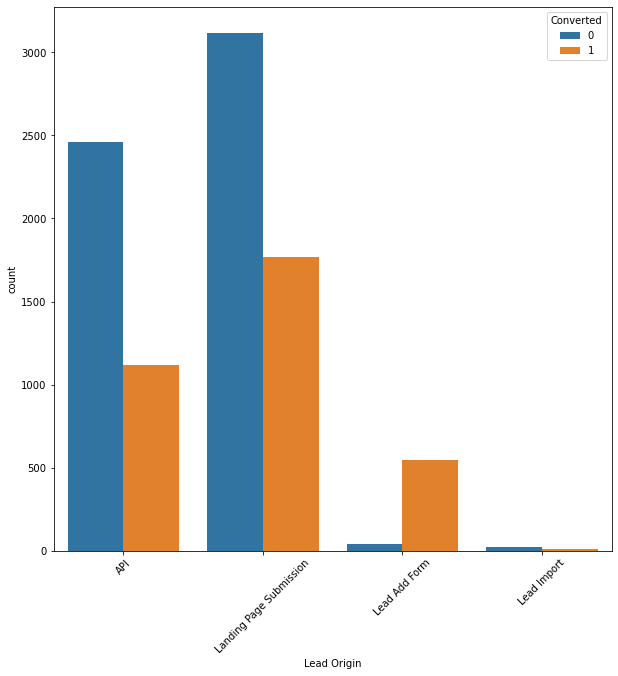

In [33]:
# Lead Origin Vs Cnoverted

plt.figure(figsize=(10,10))
sns.countplot(leads['Lead Origin'], hue = leads.Converted, data=leads)
plt.xticks(rotation=45)
plt.show()

### Remarks:

1) Landing page Submission & API generate most of the leads but only has roughly half of the leads converted.
2) Leads generated from 'Lead Add Form' is less but conversion rate is high.
3) Leads generated from 'Lead Import' is very less.


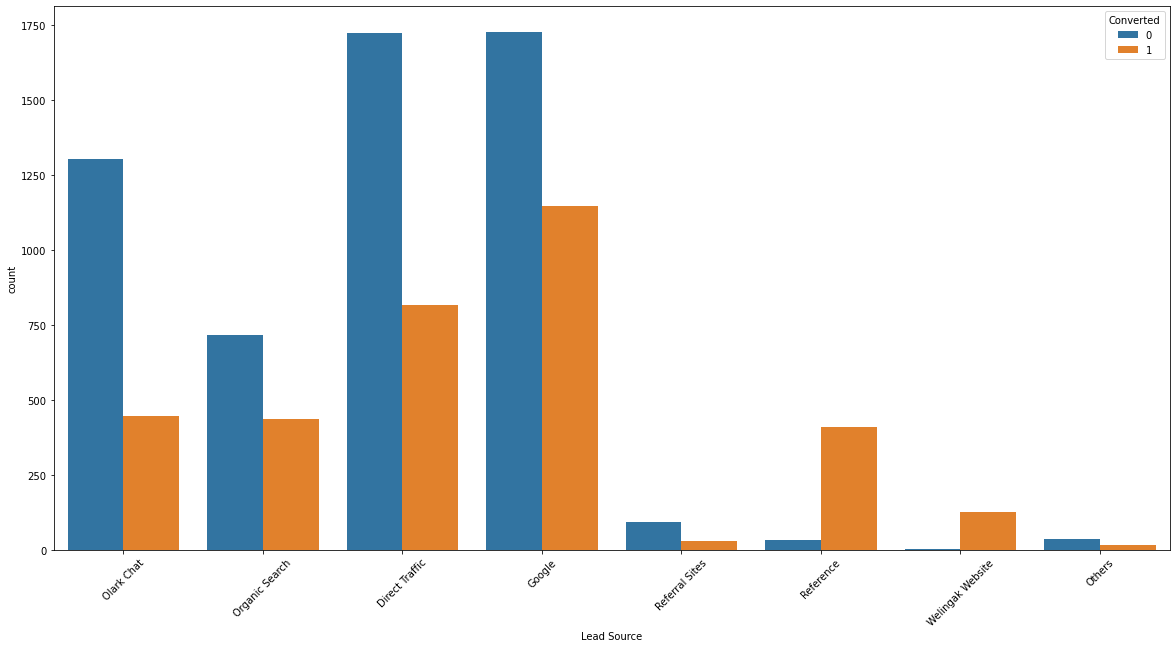

In [34]:
# Lead Source Vs Converted

plt.figure(figsize=(20,10))
sns.countplot(leads['Lead Source'], hue = leads.Converted, data=leads)
plt.xticks(rotation=45)
plt.show()


### Remarks

1) Leads from Google & Direct Traffic are the highest
2) Leads from References & Wellingak Website are low but conversion rate is high

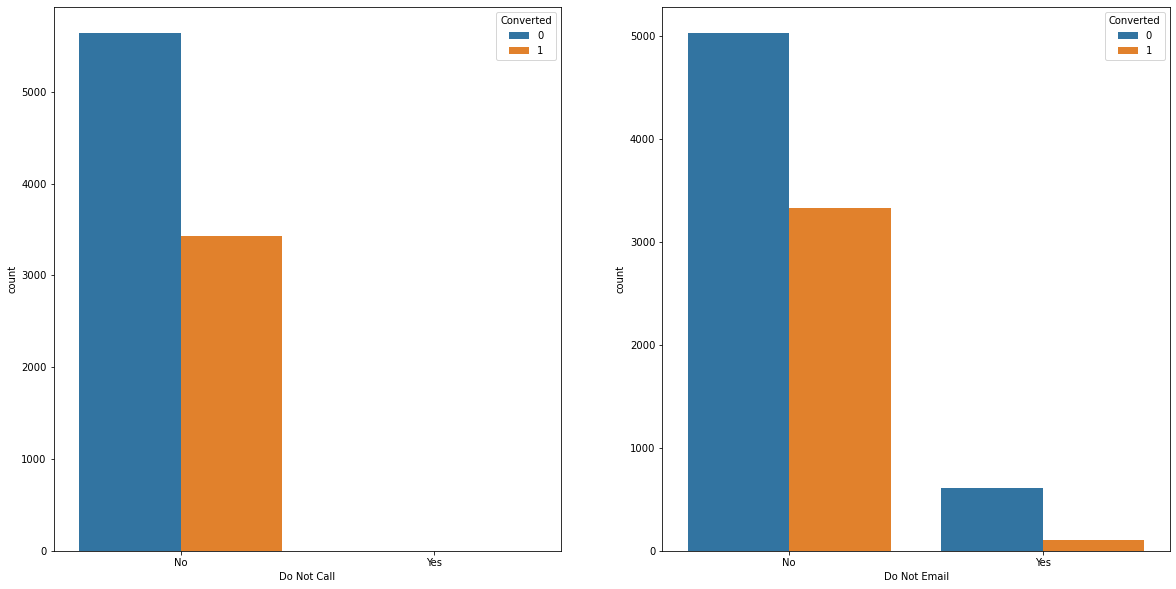

In [35]:
# Do not Email, Do not call vs Converted

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.countplot(leads['Do Not Call'], hue = leads.Converted, data=leads)
plt.subplot(1,2,2)
sns.countplot(leads['Do Not Email'], hue = leads.Converted, data=leads)
plt.show()

### Remarks -

Major Conversions happened from Emails Sent and Calls made

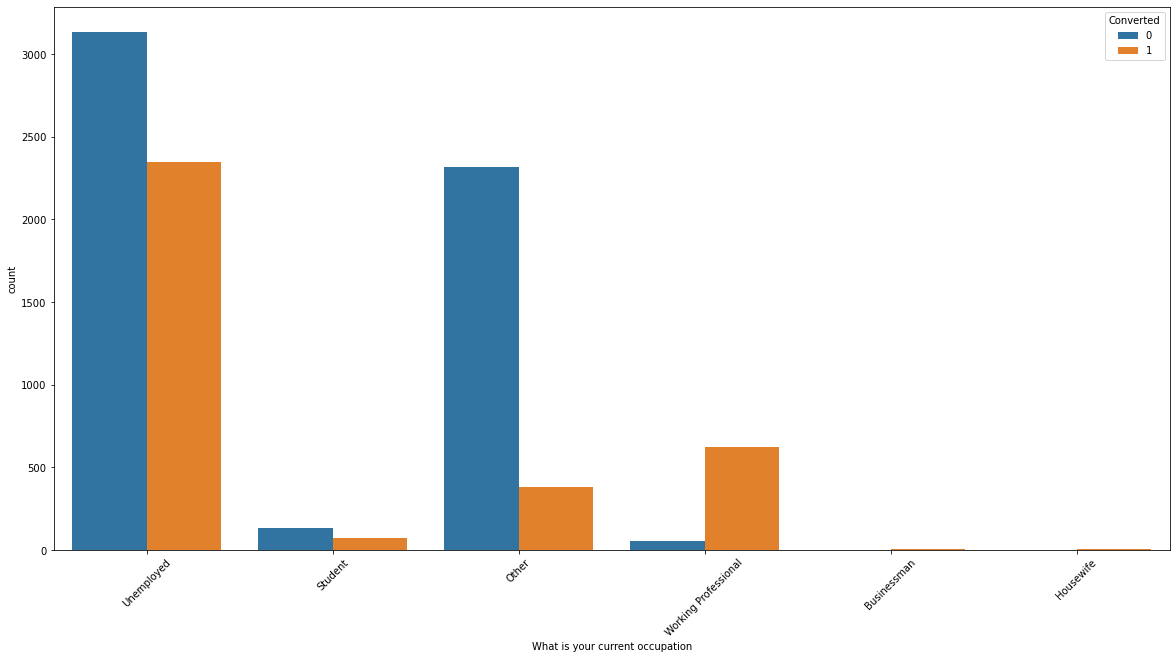

In [36]:
# What is your current occupation Vs Converted

plt.figure(figsize=(20,10))
sns.countplot(leads['What is your current occupation'], hue=leads.Converted, data=leads)
plt.xticks(rotation=45)
plt.show()

### Remarks

Majority Conversions happend for people who are unemployed and Working professionals.


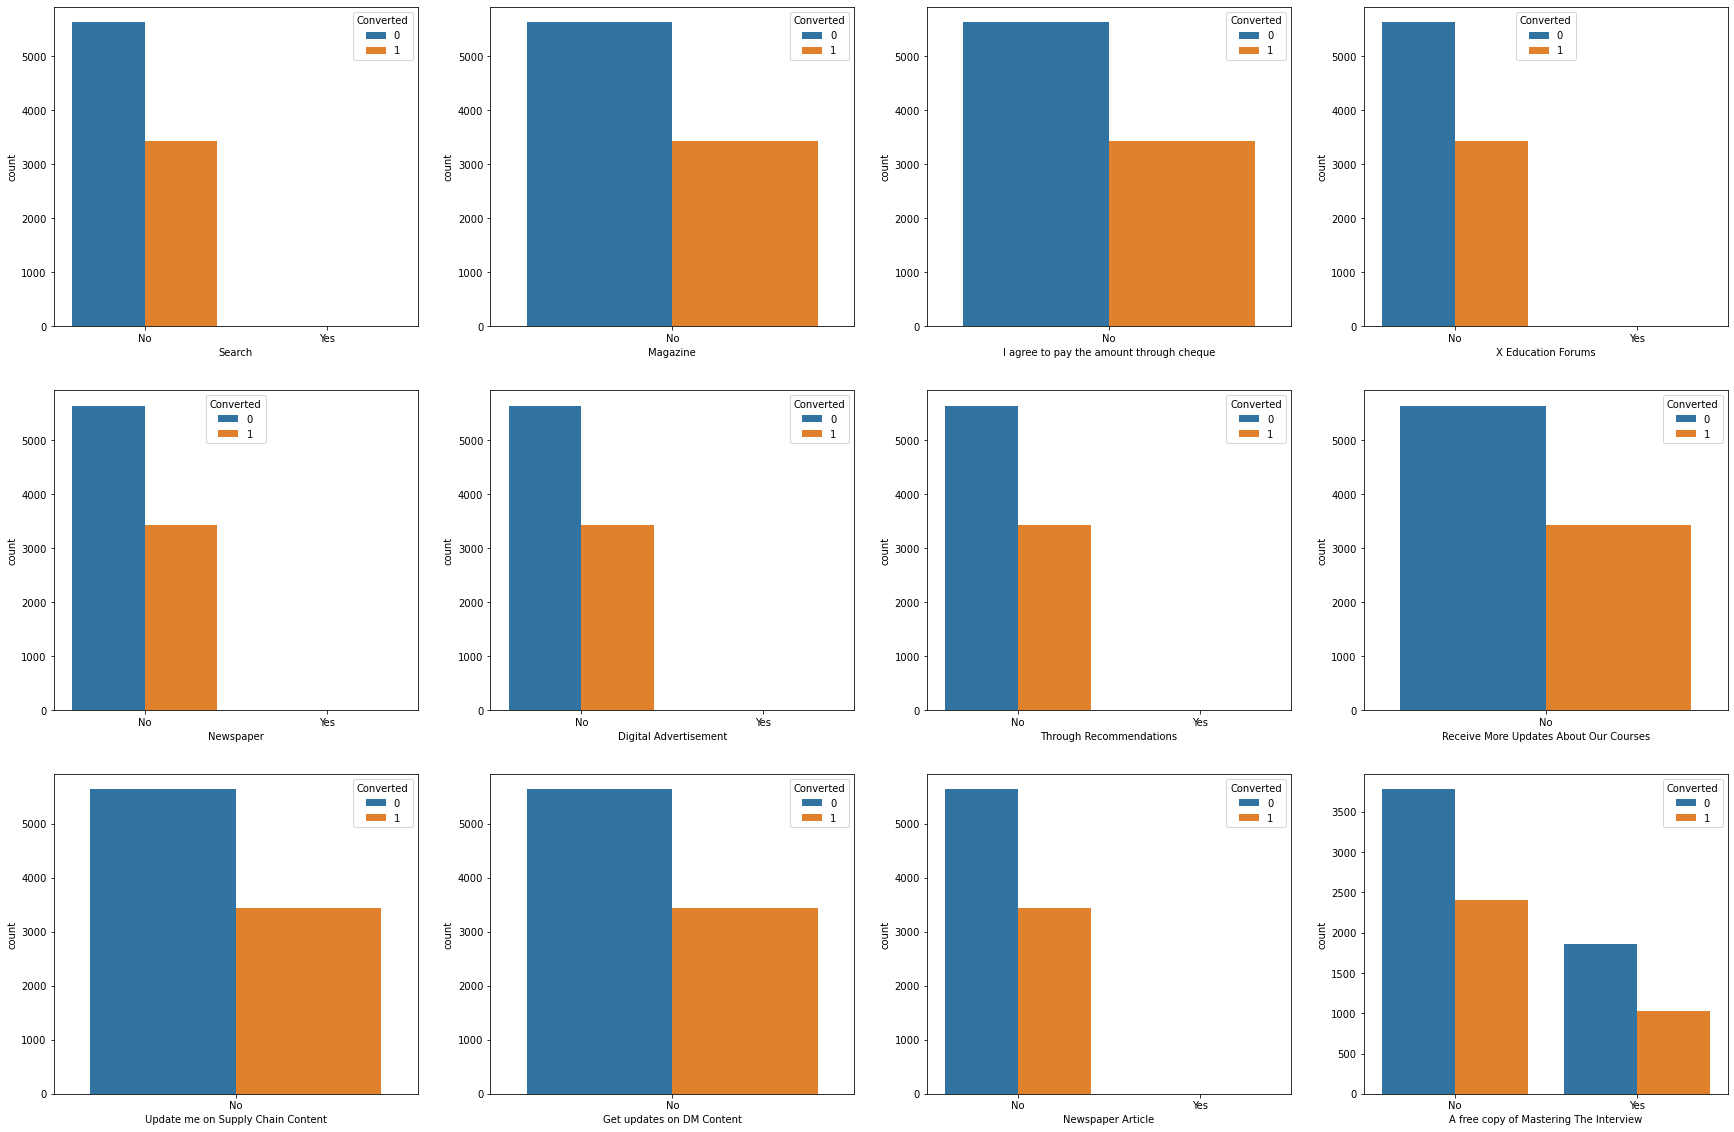

In [37]:
plt.figure(figsize=(30,20))
plt.subplot(3,4,1)
sns.countplot(leads.Search, hue=leads.Converted, data=leads)
plt.subplot(3,4,2)
sns.countplot(leads.Magazine, hue=leads.Converted, data=leads)
plt.subplot(3,4,3)
sns.countplot(leads['I agree to pay the amount through cheque'], hue=leads.Converted, data=leads)
plt.subplot(3,4,4)
sns.countplot(leads['X Education Forums'], hue=leads.Converted, data=leads)
plt.subplot(3,4,5)
sns.countplot(leads.Newspaper, hue=leads.Converted, data=leads)
plt.subplot(3,4,6)
sns.countplot(leads['Digital Advertisement'], hue=leads.Converted, data=leads)
plt.subplot(3,4,7)
sns.countplot(leads['Through Recommendations'], hue=leads.Converted, data=leads)
plt.subplot(3,4,8)
sns.countplot(leads['Receive More Updates About Our Courses'], hue=leads.Converted, data=leads)
plt.subplot(3,4,9)
sns.countplot(leads['Update me on Supply Chain Content'], hue=leads.Converted, data=leads)
plt.subplot(3,4,10)
sns.countplot(leads['Get updates on DM Content'], hue=leads.Converted, data=leads)
plt.subplot(3,4,11)
sns.countplot(leads['Newspaper Article'], hue=leads.Converted, data=leads)
plt.subplot(3,4,12)
sns.countplot(leads['A free copy of Mastering The Interview'], hue=leads.Converted, data=leads)
plt.show()

In [38]:
# Looking for Continuous columns for dummies
Column_dummies = ['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation',
        'Last Notable Activity']

leads_dummies = pd.get_dummies(leads[Column_dummies], drop_first=True)
leads_dummies.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [39]:
leads.shape

(9074, 26)

In [40]:
leads = pd.concat([leads,leads_dummies], axis=1)
leads.drop(['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation',
        'Last Notable Activity'], axis=1, inplace=True)


In [41]:
leads.shape

(9074, 50)

In [42]:
leads.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,No,No,0,0.0,0,0.0,India,No,No,No,No,No,No,No,No,No,No,No,No,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,No,No,0,5.0,674,2.5,India,No,No,No,No,No,No,No,No,No,No,No,No,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,No,No,1,2.0,1532,2.0,India,No,No,No,No,No,No,No,No,No,No,No,Yes,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,No,No,0,1.0,305,1.0,India,No,No,No,No,No,No,No,No,No,No,No,No,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,No,No,1,2.0,1428,1.0,India,No,No,No,No,No,No,No,No,No,No,No,No,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [43]:
leads['Magazine'].value_counts()

No    9074
Name: Magazine, dtype: int64

In [44]:
leads['Search'].value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

In [45]:
leads['Newspaper Article'].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [46]:
leads['X Education Forums'].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [47]:
leads['Newspaper'].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [48]:
leads['Digital Advertisement'].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [49]:
leads['Through Recommendations'].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [50]:
leads['Receive More Updates About Our Courses'].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

In [51]:
leads['Update me on Supply Chain Content'].value_counts()

No    9074
Name: Update me on Supply Chain Content, dtype: int64

In [52]:
leads['I agree to pay the amount through cheque'].value_counts()

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

In [53]:
leads['A free copy of Mastering The Interview'].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [54]:
leads['Get updates on DM Content'].value_counts()

No    9074
Name: Get updates on DM Content, dtype: int64

In [55]:
leads['Do Not Email'].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [56]:
leads['Do Not Call'].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [57]:
var_list =  ['Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']


In [58]:
# We'll drop the following columns because they are highly skewed.
leads.drop(['Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], axis=1, inplace=True)

In [59]:
leads.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,No,No,0,0.0,0,0.0,India,No,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,No,No,0,5.0,674,2.5,India,No,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,No,No,1,2.0,1532,2.0,India,Yes,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,No,No,0,1.0,305,1.0,India,No,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,No,No,1,2.0,1428,1.0,India,No,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [60]:
leads.shape

(9074, 39)

In [61]:
var_list =  ['A free copy of Mastering The Interview','Do Not Email','Do Not Call']
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[var_list] = leads[var_list].apply(binary_map)

In [62]:
leads.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,India,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,India,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,India,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,India,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,India,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [63]:
leads.shape

(9074, 39)

In [64]:
# Checking for outliers in the continuous variables
num_leads = leads[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']]

In [65]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Total Time Spent on Website,Page Views Per Visit,TotalVisits
count,9074.000000,9074.000000,9074.000000
mean,482.887481,2.370151,3.456028
std,545.256560,2.160871,4.858802
min,0.000000,0.000000,0.000000
25%,11.000000,1.000000,1.000000
50%,246.000000,2.000000,3.000000
75%,922.750000,3.200000,5.000000
90%,1373.000000,5.000000,7.000000
95%,1557.000000,6.000000,10.000000
99%,1839.000000,9.000000,17.000000


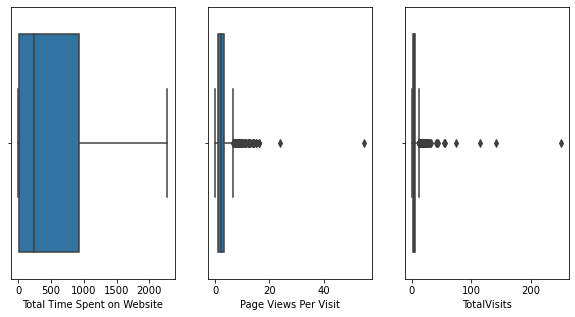

In [66]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.boxplot(leads['Total Time Spent on Website'])
plt.subplot(1,3,2)
sns.boxplot(leads['Page Views Per Visit'])
plt.subplot(1,3,3)
sns.boxplot(leads['TotalVisits'])
plt.show()

In [67]:
leads = leads[leads['Page Views Per Visit']<=leads['Page Views Per Visit'].quantile(0.99)]

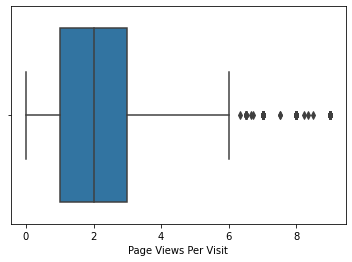

In [68]:
sns.boxplot(leads['Page Views Per Visit'])
plt.show()

In [69]:
leads = leads[leads['TotalVisits']<=leads['TotalVisits'].quantile(0.99)]

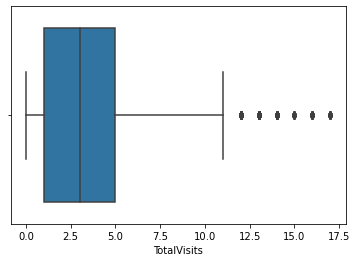

In [70]:
sns.boxplot(leads['TotalVisits'])
plt.show()

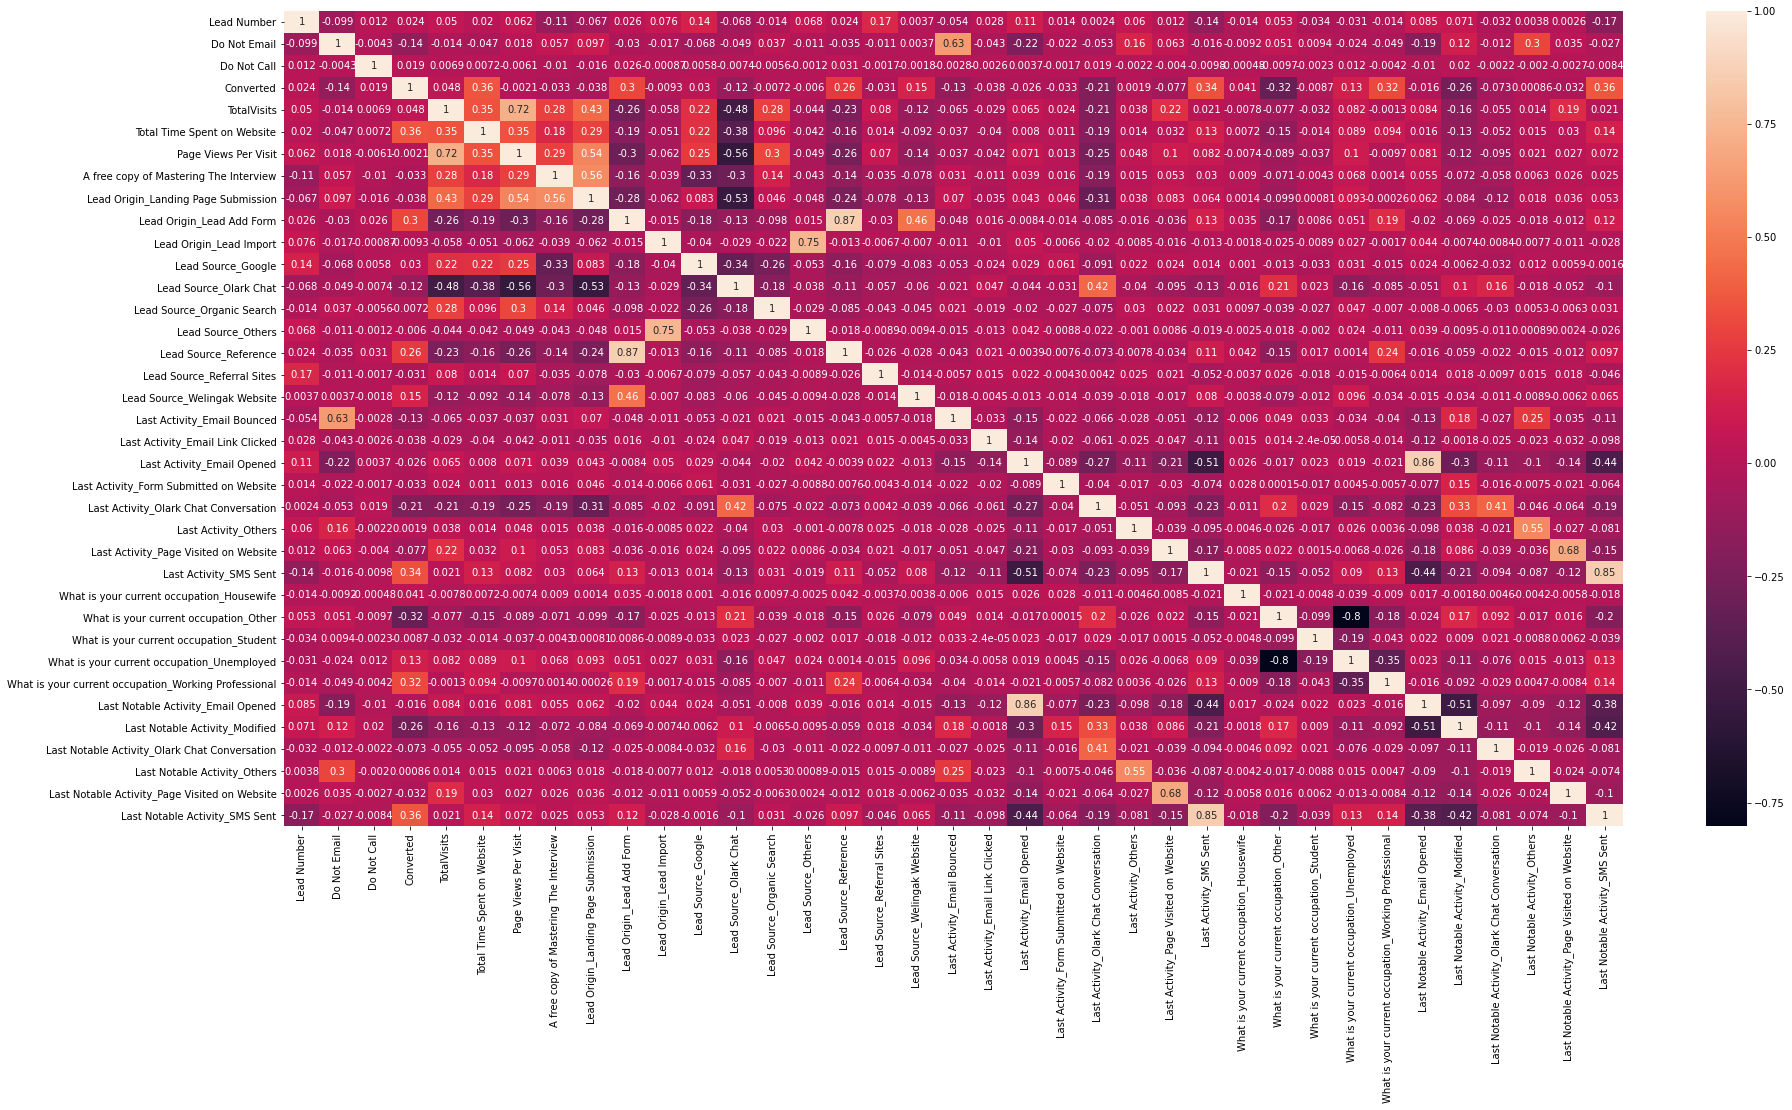

In [71]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,15))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

### Dropping highly correlated dummy variables - We are not choosing the manual method of elimination rather we will go ahead with RFE selection approach.

In [72]:
leads.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,India,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,India,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,India,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,India,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,India,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [73]:
leads.shape

(8924, 39)

In [74]:
# As we've mentioned earlier, Country column is highly skewed.We'll drop it.
leads = leads.drop('Country', axis=1)

### Split data into Train & Test data

In [75]:
from sklearn.model_selection import train_test_split
X = leads.drop(['Prospect ID','Converted','Lead Number'], axis=1)
y = leads.Converted
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling 

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaling_cols = ['Total Time Spent on Website', 'Page Views Per Visit']
X_train[scaling_cols] = scaler.fit_transform(X_train[scaling_cols])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
6676,0,0,3.0,1.395668,0.395289,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
6138,0,0,4.0,0.609686,0.926758,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
8650,0,0,3.0,1.178657,0.395289,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
3423,0,0,0.0,-0.878390,-1.199117,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
6552,0,0,0.0,-0.878390,-1.199117,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


## Building the model

In [77]:
# Calculate VIF for all the features
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
np.random.seed(0)

def vifCalc(leads):
    vif = pd.DataFrame()
    vif['Features'] = leads.columns
    vif['VIF'] = [variance_inflation_factor(leads.values, i) for i in range(leads.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [78]:
from sklearn.linear_model import LogisticRegression as logr
# Logistic Regression Model
lr = logr()
lr = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
lr.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6210
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2465.0
Date:                Mon, 12 Apr 2021   Deviance:                       4929.9
Time:                        17:38:22   Pearson chi2:                 6.32e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7020      1.870     -1.445      0.149      -6.368       0.964
Do Not Email                                            -1.4662      0.220     -6.670      0.000      -1.897      -1.035
Do Not Call                                             21.8829   3.22e+04      0.001      0.999   -6.31e+04    6.31e+04
TotalVisits                                              0.1187      0.019      6.380      0.000       0.082       0.155
Total Time Spent on Website                              1.1012      0.042     26.263      0.000       1.019       1.183
Page Views Per Visit                                    -0.3030      0.059     -5.108      0.000      -0.419      -0.187
A free copy of Mastering The Interview                  -0.0458      0.112     -0.409      0.682      -0.265       0.173
Lead Origin_Landing Page Submission                     -0.1398      0.110     -1.267      0.205      -0.356       0.076
Lead Origin_Lead Add Form                                2.1997      1.094      2.010      0.044       0.055       4.345
Lead Origin_Lead Import                                  1.2051      1.047      1.151      0.250      -0.846       3.257
Lead Source_Google                                       0.3389      0.120      2.826      0.005       0.104       0.574
Lead Source_Olark Chat                                   1.3480      0.169      7.982      0.000       1.017       1.679
Lead Source_Organic Search                               0.1815      0.137      1.322      0.186      -0.088       0.451
Lead Source_Others                                      -0.0665      0.927     -0.072      0.943      -1.883       1.750
Lead Source_Reference                                    1.5132      1.118      1.353      0.176      -0.679       3.705
Lead Source_Referral Sites                              -0.0149      0.350     -0.042      0.966      -0.701       0.671
Lead Source_Welingak Website                             3.2527      1.314      2.476      0.013       0.678       5.827
Last Activity_Email Bounced                             -0.3505      0.532     -0.659      0.510      -1.393       0.692
Last Activity_Email Link Clicked                         0.7536      0.425      1.774      0.076      -0.079       1.586
Last Activity_Email Opened                               1.1600      0.255      4.544      0.000       0.660       1.660
Last Activity_Form Submitted on Website                  0.5818      0.386      1.506      0.132      -0.175       1.339
Last Activity_Olark Chat Conversation                   -0.3261      0.292     -1.118      0.263      -0.898       0.246
Last Activity_Others                                     1

In [79]:
# Running RFE [ We'll take 15 Variables]
from sklearn.linear_model import LogisticRegression as lr
logr = lr()
from sklearn.feature_selection import RFE
rfe = RFE(logr, 15)             
rfe = rfe.fit(X_train, y_train)

In [80]:
rfe.support_

array([ True, False, False,  True, False, False, False,  True,  True,
       False,  True, False, False,  True, False,  True, False, False,
        True, False, False,  True, False,  True,  True,  True, False,
       False,  True, False, False, False,  True, False,  True])

In [81]:
col = X_train.columns[rfe.support_]

In [82]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [83]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 7),
 ('TotalVisits', False, 19),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 16),
 ('A free copy of Mastering The Interview', False, 21),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 11),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 15),
 ('Lead Source_Others', False, 17),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 20),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 8),
 ('Last Activity_Email Link Clicked', False, 2),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 4),
 ('Last Activity_Olark Chat Conversation', False, 9),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 3),
 ('Last Activity_SMS Sent', Tru

In [84]:
top_15 = X_train.columns[rfe.support_]
top_15

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [85]:
X_train_sm = sm.add_constant(X_train[top_15])
lr2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lr2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6230
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2522.1
Date:                Mon, 12 Apr 2021   Deviance:                       5044.2
Time:                        17:38:24   Pearson chi2:                 6.33e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9628      0.091    -21.592      0.000      -2.141      -1.785
Do Not Email                                            -1.6402      0.204     -8.049      0.000      -2.040      -1.241
Total Time Spent on Website                              1.1294      0.042     27.206      0.000       1.048       1.211
Lead Origin_Lead Add Form                                2.2456      0.881      2.550      0.011       0.519       3.972
Lead Origin_Lead Import                                  1.0818      0.487      2.222      0.026       0.127       2.036
Lead Source_Olark Chat                                   1.2160      0.103     11.800      0.000       1.014       1.418
Lead Source_Reference                                    1.4976      0.907      1.651      0.099      -0.281       3.276
Lead Source_Welingak Website                             3.2270      1.140      2.831      0.005       0.993       5.461
Last Activity_Email Opened                               0.9437      0.097      9.745      0.000       0.754       1.134
Last Activity_Others                                     0.9689      0.309      3.137      0.002       0.364       1.574
Last Activity_SMS Sent                                   1.2090      0.164      7.370      0.000       0.887       1.531
What is your current occupation_Housewife               22.8929   1.71e+04      0.001      0.999   -3.35e+04    3.35e+04
What is your current occupation_Other                   -1.0973      0.089    -12.377      0.000      -1.271      -0.924
What is your current occupation_Working Professional     2.4319      0.186     13.096      0.000       2.068       2.796
Last Notable Activity_Others                             1.5348      0.368      4.169      0.000       0.813       2.256
Last Notable Activity_SMS Sent                           1.1835      0.158      7.469      0.000       0.873       1.494
========================================================================================================================
"""

In [86]:
top_14 = top_15.drop('What is your current occupation_Housewife')

In [87]:
X_train_sm = sm.add_constant(X_train[top_14])
lr2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lr2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6231
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2526.7
Date:                Mon, 12 Apr 2021   Deviance:                       5053.5
Time:                        17:38:24   Pearson chi2:                 6.33e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9601      0.091    -21.573      0.000      -2.138      -1.782
Do Not Email                                            -1.6407      0.204     -8.051      0.000      -2.040      -1.241
Total Time Spent on Website                              1.1290      0.041     27.224      0.000       1.048       1.210
Lead Origin_Lead Add Form                                2.2382      0.880      2.542      0.011       0.513       3.964
Lead Origin_Lead Import                                  1.0741      0.487      2.206      0.027       0.120       2.028
Lead Source_Olark Chat                                   1.2117      0.103     11.767      0.000       1.010       1.413
Lead Source_Reference                                    1.5053      0.907      1.660      0.097      -0.272       3.283
Lead Source_Welingak Website                             3.2293      1.139      2.834      0.005       0.996       5.463
Last Activity_Email Opened                               0.9508      0.097      9.823      0.000       0.761       1.140
Last Activity_Others                                     0.9677      0.309      3.133      0.002       0.362       1.573
Last Activity_SMS Sent                                   1.2088      0.164      7.368      0.000       0.887       1.530
What is your current occupation_Other                   -1.1012      0.089    -12.426      0.000      -1.275      -0.927
What is your current occupation_Working Professional     2.4268      0.186     13.070      0.000       2.063       2.791
Last Notable Activity_Others                             1.5349      0.368      4.169      0.000       0.813       2.256
Last Notable Activity_SMS Sent                           1.1827      0.158      7.464      0.000       0.872       1.493
========================================================================================================================
"""

In [88]:
vif = vifCalc(X_train_sm)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,46.48
6,Lead Source_Reference,37.29
7,Lead Source_Welingak Website,11.38
0,const,5.25
10,Last Activity_SMS Sent,4.37
14,Last Notable Activity_SMS Sent,3.95
8,Last Activity_Email Opened,1.55
13,Last Notable Activity_Others,1.51
9,Last Activity_Others,1.45
2,Total Time Spent on Website,1.32


In [89]:
top_13 = top_14.drop('Lead Origin_Lead Add Form')

In [90]:
X_train_sm = sm.add_constant(X_train[top_13])
lr3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lr3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6232
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2530.4
Date:                Mon, 12 Apr 2021   Deviance:                       5060.9
Time:                        17:38:24   Pearson chi2:                 6.33e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9525      0.091    -21.538      0.000      -2.130      -1.775
Do Not Email                                            -1.6427      0.204     -8.065      0.000      -2.042      -1.243
Total Time Spent on Website                              1.1264      0.041     27.212      0.000       1.045       1.208
Lead Origin_Lead Import                                  1.0646      0.487      2.188      0.029       0.111       2.019
Lead Source_Olark Chat                                   1.2083      0.103     11.759      0.000       1.007       1.410
Lead Source_Reference                                    3.7346      0.233     16.006      0.000       3.277       4.192
Lead Source_Welingak Website                             5.4593      0.728      7.500      0.000       4.033       6.886
Last Activity_Email Opened                               0.9520      0.097      9.852      0.000       0.763       1.141
Last Activity_Others                                     0.9630      0.309      3.120      0.002       0.358       1.568
Last Activity_SMS Sent                                   1.2051      0.164      7.350      0.000       0.884       1.526
What is your current occupation_Other                   -1.1064      0.089    -12.498      0.000      -1.280      -0.933
What is your current occupation_Working Professional     2.4203      0.186     13.041      0.000       2.057       2.784
Last Notable Activity_Others                             1.5342      0.368      4.169      0.000       0.813       2.255
Last Notable Activity_SMS Sent                           1.1830      0.158      7.468      0.000       0.873       1.493
========================================================================================================================
"""

In [91]:
vif = vifCalc(X_train_sm)
vif

,Features,VIF
0,const,5.25
9,Last Activity_SMS Sent,4.37
13,Last Notable Activity_SMS Sent,3.95
7,Last Activity_Email Opened,1.55
12,Last Notable Activity_Others,1.51
8,Last Activity_Others,1.45
2,Total Time Spent on Website,1.32
4,Lead Source_Olark Chat,1.28
1,Do Not Email,1.17
5,Lead Source_Reference,1.16


In [92]:
top_12 = top_13.drop('Last Activity_SMS Sent')

In [93]:
X_train_sm = sm.add_constant(X_train[top_12])
lr4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lr4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6233
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2556.4
Date:                Mon, 12 Apr 2021   Deviance:                       5112.7
Time:                        17:38:24   Pearson chi2:                 6.54e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6971      0.080    -21.210      0.000      -1.854      -1.540
Do Not Email                                            -1.6703      0.202     -8.282      0.000      -2.066      -1.275
Total Time Spent on Website                              1.1301      0.041     27.411      0.000       1.049       1.211
Lead Origin_Lead Import                                  1.2355      0.491      2.519      0.012       0.274       2.197
Lead Source_Olark Chat                                   1.1496      0.102     11.325      0.000       0.951       1.349
Lead Source_Reference                                    3.8468      0.234     16.442      0.000       3.388       4.305
Lead Source_Welingak Website                             5.7528      0.736      7.812      0.000       4.309       7.196
Last Activity_Email Opened                               0.6950      0.087      7.981      0.000       0.524       0.866
Last Activity_Others                                     0.7683      0.304      2.528      0.011       0.173       1.364
What is your current occupation_Other                   -1.0662      0.088    -12.149      0.000      -1.238      -0.894
What is your current occupation_Working Professional     2.4006      0.184     13.052      0.000       2.040       2.761
Last Notable Activity_Others                             1.4155      0.363      3.901      0.000       0.704       2.127
Last Notable Activity_SMS Sent                           2.1355      0.097     21.945      0.000       1.945       2.326
========================================================================================================================
"""

In [94]:
vif = vifCalc(X_train_sm)
vif

,Features,VIF
0,const,4.60
11,Last Notable Activity_Others,1.51
8,Last Activity_Others,1.44
12,Last Notable Activity_SMS Sent,1.41
7,Last Activity_Email Opened,1.39
2,Total Time Spent on Website,1.32
4,Lead Source_Olark Chat,1.27
1,Do Not Email,1.17
5,Lead Source_Reference,1.15
9,What is your current occupation_Other,1.15


In [95]:
# Prediction on the Train Dataset
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index

y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,1,0.639962,6676,1
1,1,0.755365,6138,1
2,1,0.938808,8650,1
3,0,0.068726,3423,0
4,0,0.128821,6552,0


In [96]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)
# Let's check the overall accuracy as well
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3421  450]
 [ 724 1651]]
0.8120397054114633


In [97]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.639962,6676,1,1,1,1,1,1,1,1,0,0,0
1,1,0.755365,6138,1,1,1,1,1,1,1,1,1,0,0
2,1,0.938808,8650,1,1,1,1,1,1,1,1,1,1,1
3,0,0.068726,3423,0,1,0,0,0,0,0,0,0,0,0
4,0,0.128821,6552,0,1,1,0,0,0,0,0,0,0,0


In [98]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    sensi = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff)

     prob  accuracy     sensi     speci
0.0   0.0  0.380243  1.000000  0.000000
0.1   0.1  0.618956  0.973053  0.401705
0.2   0.2  0.768972  0.908211  0.683544
0.3   0.3  0.803074  0.871158  0.761302
0.4   0.4  0.813481  0.773895  0.837768
0.5   0.5  0.812040  0.695158  0.883751
0.6   0.6  0.806596  0.624842  0.918109
0.7   0.7  0.781780  0.509474  0.948850
0.8   0.8  0.759846  0.419789  0.968484
0.9   0.9  0.714217  0.271579  0.985792


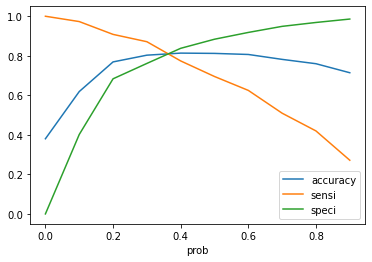

In [99]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [100]:
#### From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.639962,6676,1,1,1,1,1,1,1,1,0,0,0,1,64
1,1,0.755365,6138,1,1,1,1,1,1,1,1,1,0,0,1,76
2,1,0.938808,8650,1,1,1,1,1,1,1,1,1,1,1,1,94
3,0,0.068726,3423,0,1,0,0,0,0,0,0,0,0,0,0,7
4,0,0.128821,6552,0,1,1,0,0,0,0,0,0,0,0,0,13


In [101]:
#Calculating the accuracy score
accuracy_score = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print(accuracy_score)
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

0.8133205251360871
[[3172  699]
 [ 467 1908]]


In [102]:
#Calculating the Sensitivity 
TP/float(TP+FN)

0.8033684210526316

In [103]:
#Specificity
TN/float(TN+FP)

0.8194265047791268

In [104]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

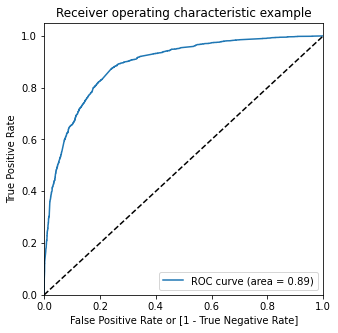

In [105]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [106]:
# Calculate Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7318757192174914

In [107]:
#Calculate Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8033684210526316

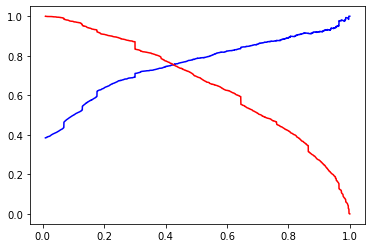

In [108]:
#Plotting the Precision - Recall Curve
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making Predication on Test Data

In [109]:
X_test[['Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7625,0,0,2.0,2.145058,-0.164140,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
5207,0,0,4.0,0.772700,0.876565,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2390,0,0,0.0,-0.885722,-1.204846,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4362,0,0,2.0,-0.451952,-0.164140,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
1023,0,0,15.0,-0.293028,1.396918,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [110]:
X_test = X_test[top_12]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Others,What is your current occupation_Other,What is your current occupation_Working Professional,Last Notable Activity_Others,Last Notable Activity_SMS Sent
7625,0,2.145058,0,0,0,0,1,0,0,0,0,0
5207,0,0.772700,0,0,0,0,1,0,0,0,0,0
2390,0,-0.885722,0,0,0,0,0,0,0,0,0,1
4362,0,-0.451952,0,0,0,0,0,0,0,0,0,1
1023,0,-0.293028,0,0,0,0,1,0,0,0,0,0


In [111]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
y_test_df['Prospect ID'] = y_test_df.index

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Probability'})
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Probability'], axis=1)

y_pred_final.head()

,Prospect ID,Converted,Converted_Probability
0,7625,0,0.805668
1,5207,1,0.467835
2,2390,1,0.362954
3,4362,0,0.481920
4,1023,0,0.208623


In [112]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Probability.map(lambda x: 1 if x > 0.37 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Probability,final_predicted
0,7625,0,0.805668,1
1,5207,1,0.467835,1
2,2390,1,0.362954,0
3,4362,0,0.481920,1
4,1023,0,0.208623,0


In [113]:
#Calculate the Score value
y_pred_final['Lead_Score'] = y_pred_final.Converted_Probability.map(lambda x: x*100 )
y_pred_final['Lead_Score'] = y_pred_final['Lead_Score'].astype('int32')
y_pred_final.head()

,Prospect ID,Converted,Converted_Probability,final_predicted,Lead_Score
0,7625,0,0.805668,1,80
1,5207,1,0.467835,1,46
2,2390,1,0.362954,0,36
3,4362,0,0.481920,1,48
4,1023,0,0.208623,0,20


In [114]:
# Accuracy of test data
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8020911127707244

In [115]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion_test)
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

[[1362  322]
 [ 208  786]]


In [116]:
#Sensitivity for test data
TP/float(TP+FN)

0.7907444668008048

In [117]:
#Specificity for test data
TN/float(TN+FP)

0.8087885985748219

In [118]:
#Precision for test data
confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])

0.7093862815884476

In [119]:
# Recall for test data
confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])

0.7907444668008048

In [120]:
#Conversion Rate of Test data
(sum(y_pred_final.final_predicted)/len(y_pred_final))*100

41.37415982076176